# Customer Segmentation



In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

# Import the dataset

In [27]:
df = pd.read_csv("Mall_Customers.csv")

# Exploratory Data Analysis

In [28]:
#Preview first 5 rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
#Preview last 5 rows of the dataset
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [30]:
#total rows and colums in the dataset
df.shape

(200, 5)

In [31]:
#There are no missing values as all the columns has 200 entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [32]:
#Missing values computation
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [33]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [34]:
# Rename columns
df.rename(columns = {"Annual Income (k$)" : "AnnualIncome", "Spending Score (1-100)" : "SpendingScore"}, inplace = True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Visualization

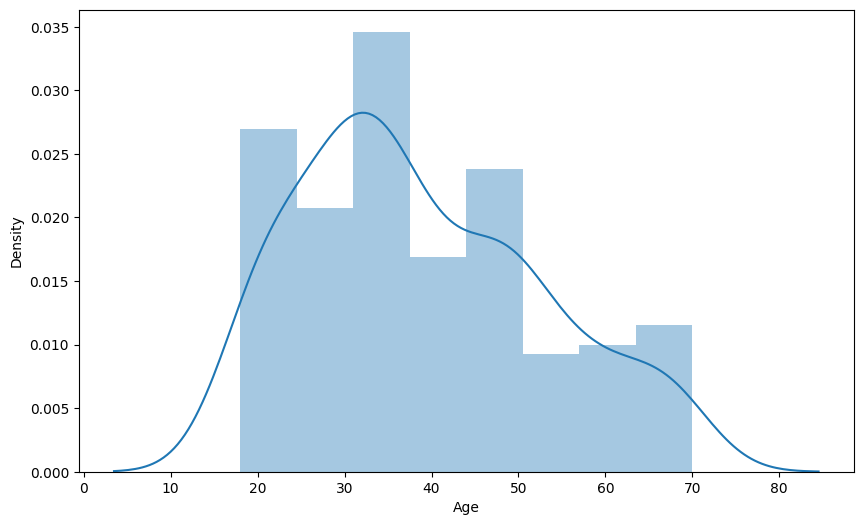

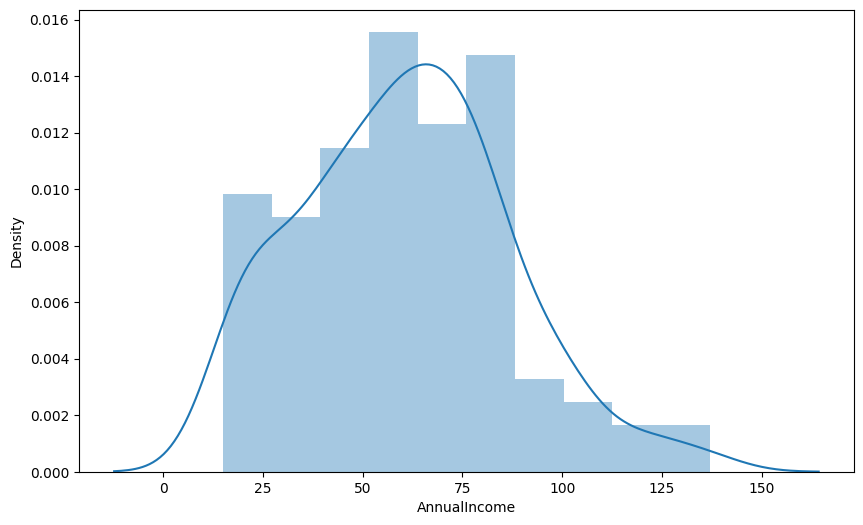

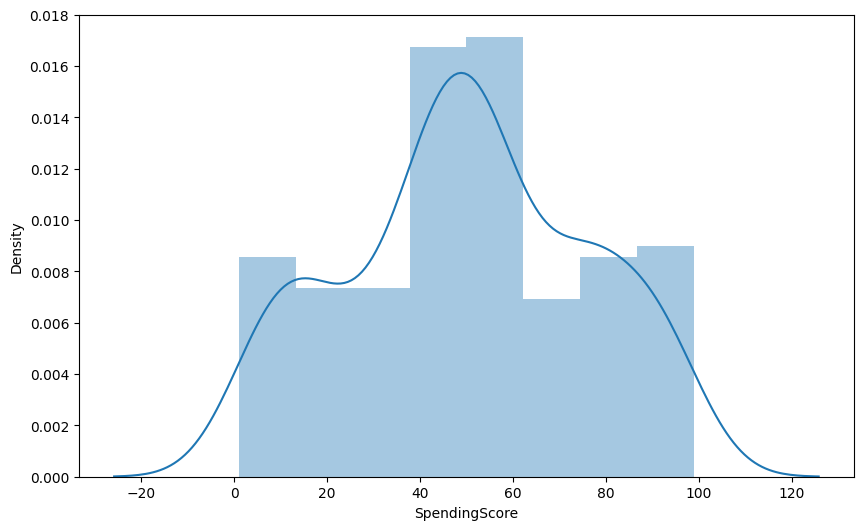

In [43]:
columns =  ['Age', 'AnnualIncome', 'SpendingScore']
for e in columns:
    plt.figure(figsize = (10 , 6))
    sns.distplot(df[e]);

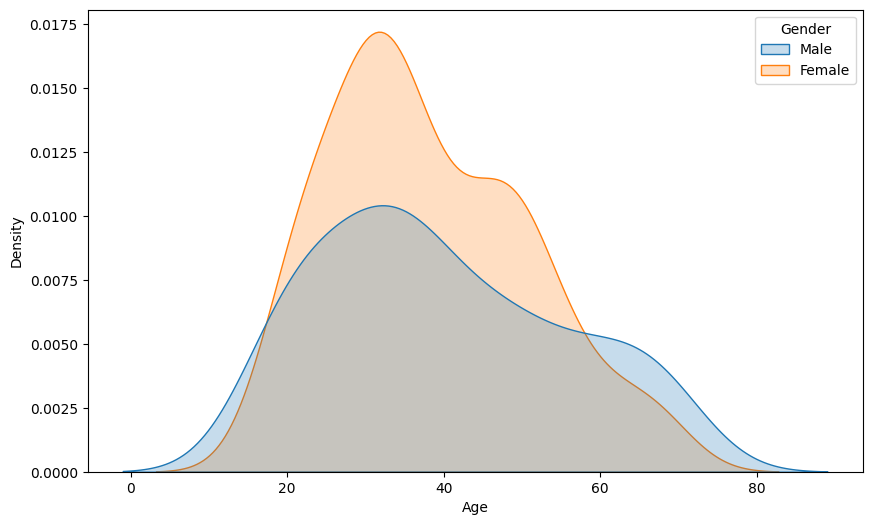

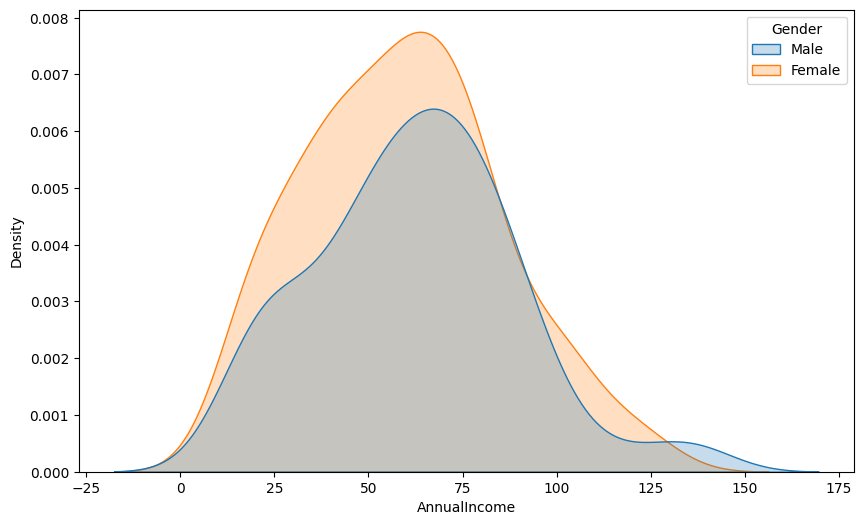

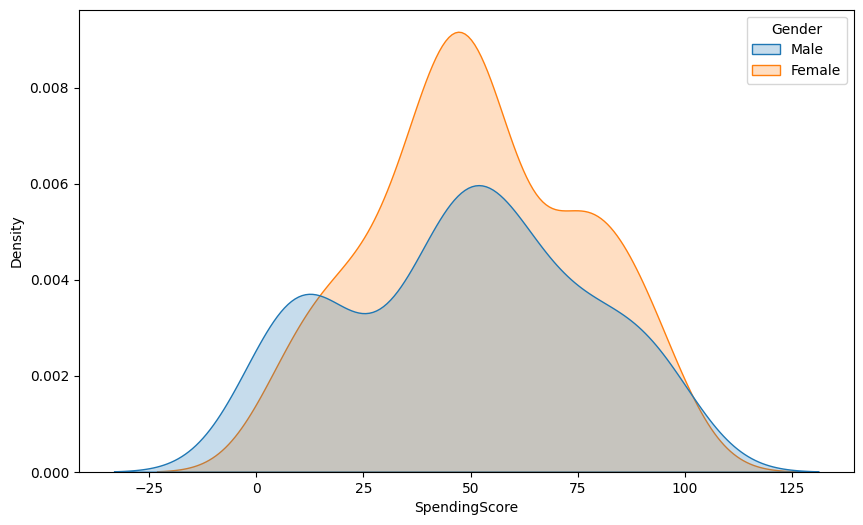

In [44]:
columns =  ['Age', 'AnnualIncome', 'SpendingScore']
for e in columns:
    plt.figure(figsize = (10 , 6))
    sns.kdeplot(x = df[e],shade = True,hue = df["Gender"]);

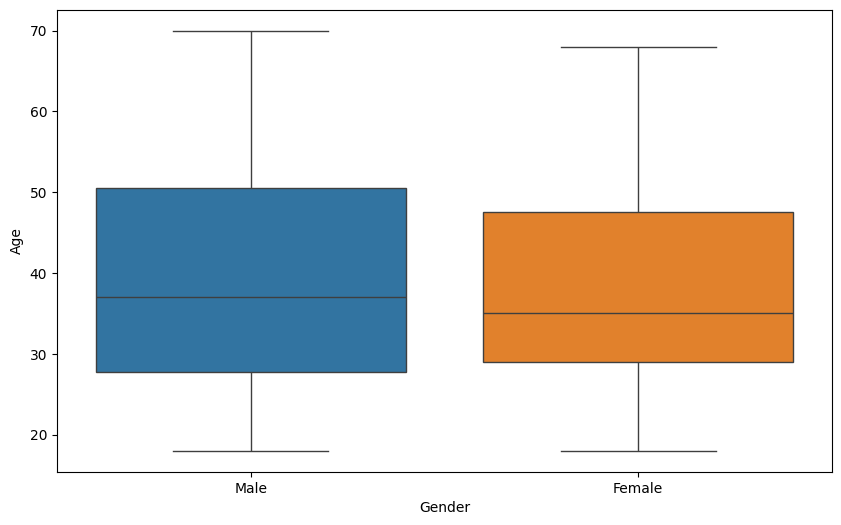

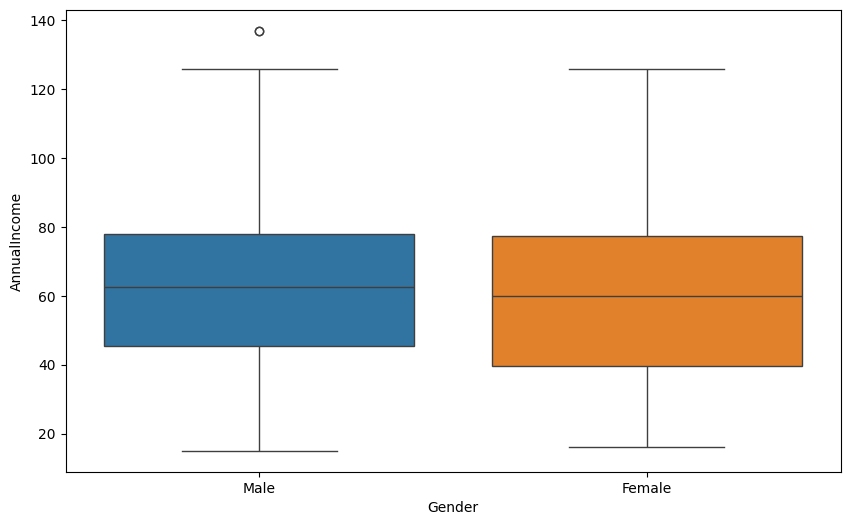

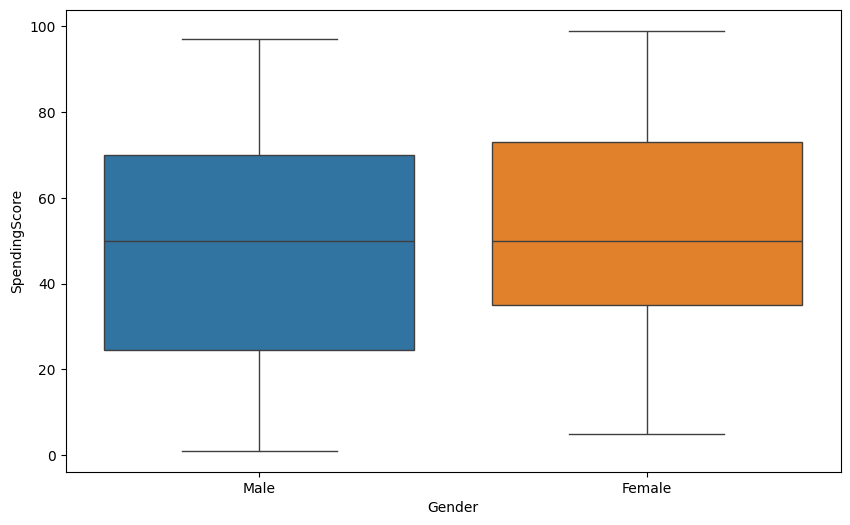

In [45]:
columns =  ['Age', 'AnnualIncome', 'SpendingScore']
for e in columns:
    plt.figure(figsize = (10 , 6))
    sns.boxplot(data = df, x = "Gender", y = df[e], hue = "Gender")


<Figure size 1000x600 with 0 Axes>

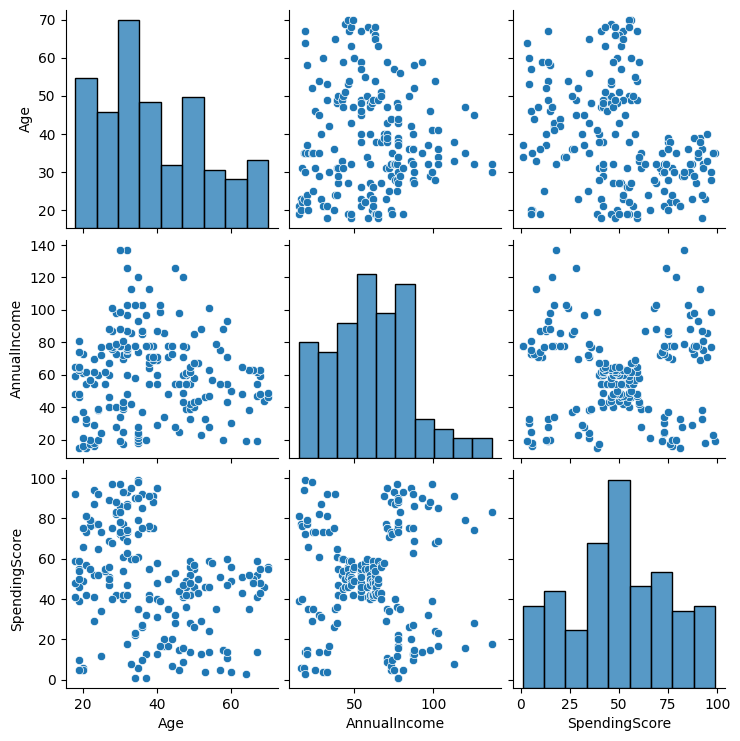

In [46]:
plt.figure(figsize = (10 , 6))
sns.pairplot(df[['Age', 'AnnualIncome', 'SpendingScore']]);

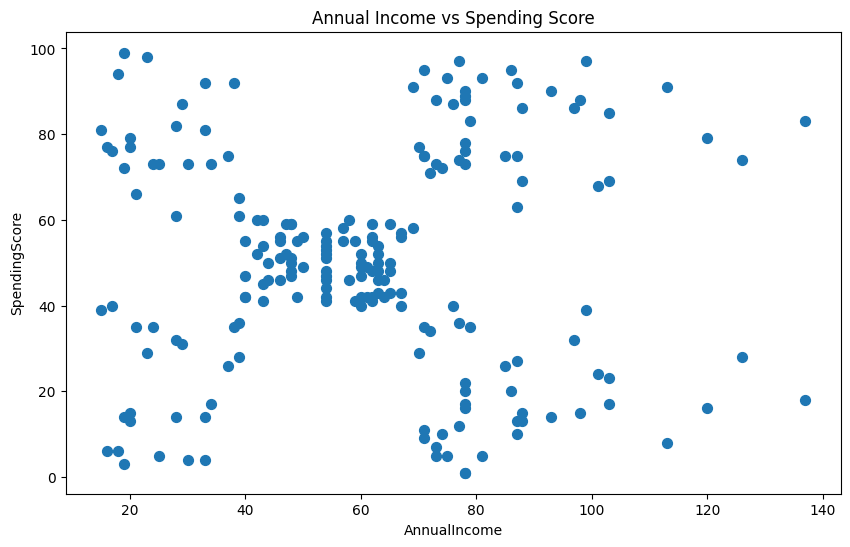

In [47]:
plt.figure(figsize = (10 , 6))
plt.scatter(x = df["AnnualIncome"], y = df["SpendingScore"], s = 50)
plt.xlabel("AnnualIncome")
plt.ylabel("SpendingScore")
plt.title("Annual Income vs Spending Score")
plt.show()

# Clustering

### Segmentation using AnnualIncome and Spending Score

In [64]:
X = df[["AnnualIncome", "SpendingScore"]]
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append([i, kmeans.inertia_])

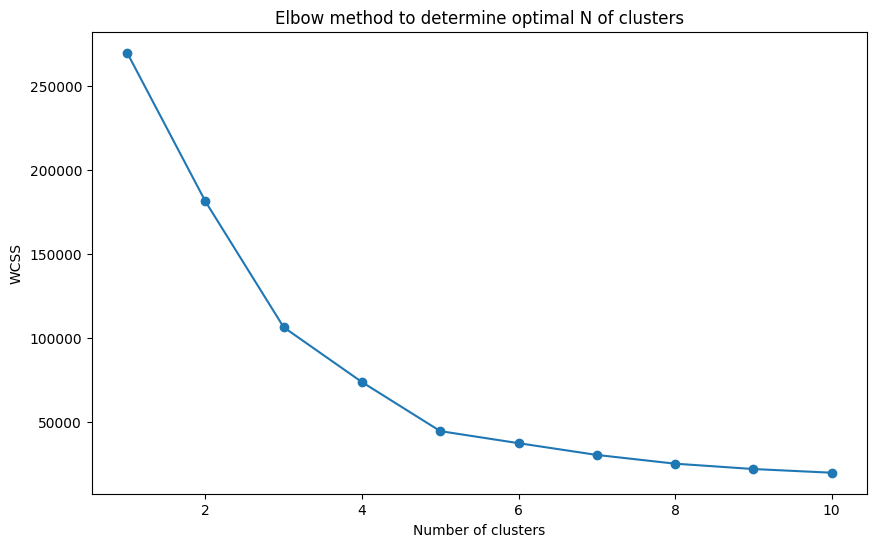

In [65]:
xy  = np.array(wcss) # transform list to numpy
plt.figure(figsize = (10 , 6))
plt.plot(xy[:, 0], xy[:, 1], linestyle = "-", marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow method to determine optimal N of clusters");

In [66]:
# Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [67]:
df["Cluster"] = y_kmeans

In [68]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,ClusterAge,ClusterAgeIncomeSpend
0,1,Male,19,15,39,3,3,4
1,2,Male,21,15,81,4,1,5
2,3,Female,20,16,6,3,2,4
3,4,Female,23,16,77,4,1,5
4,5,Female,31,17,40,3,3,4


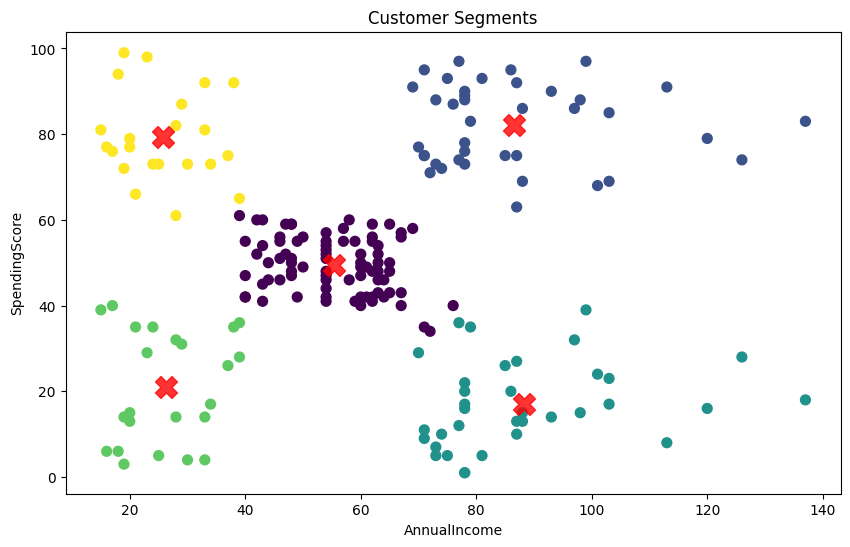

In [74]:
plt.figure(figsize = (10,6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = y_kmeans, s = 50, cmap = "viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = "red", s = 250, alpha = 0.8, marker = "X")
plt.xlabel("AnnualIncome")
plt.ylabel("SpendingScore")
plt.title("Customer Segments")
plt.show()

### Segmentation using Age and Spending Score

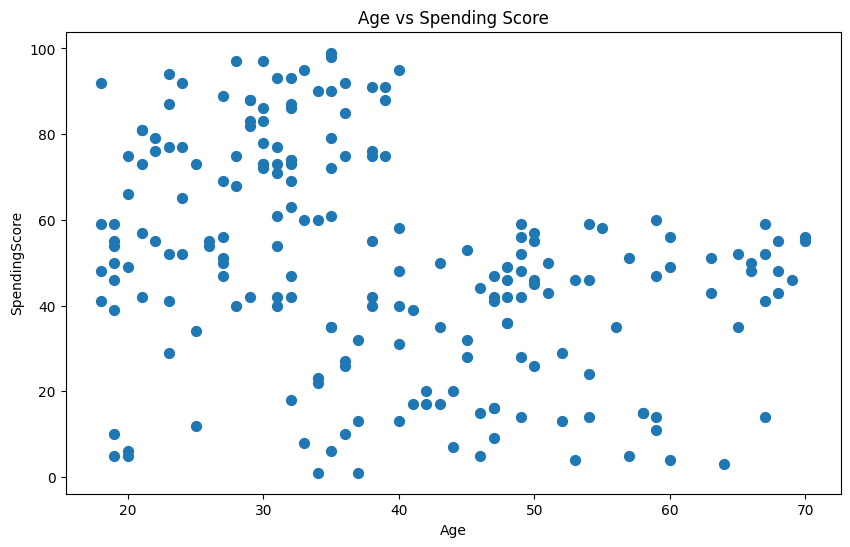

In [75]:
plt.figure(figsize = (10,6))
plt.scatter(x = df["Age"], y = df["SpendingScore"], s = 50)
plt.xlabel("Age")
plt.ylabel("SpendingScore")
plt.title("Age vs Spending Score")
plt.show()

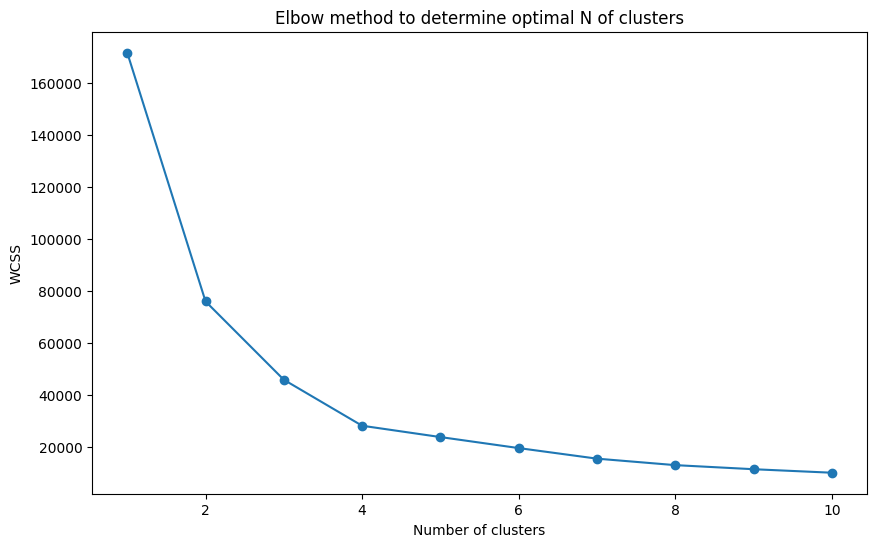

In [76]:
X = df[["Age","SpendingScore"]]
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append([i, kmeans.inertia_])
xy  = np.array(wcss) # transform list to numpy
plt.figure(figsize = (10 , 6))
plt.plot(xy[:, 0], xy[:, 1], linestyle = "-", marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow method to determine optimal N of clusters");

In [77]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
df["ClusterAge"] = y_kmeans
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,ClusterAge,ClusterAgeIncomeSpend
0,1,Male,19,15,39,3,3,4
1,2,Male,21,15,81,4,1,5
2,3,Female,20,16,6,3,2,4
3,4,Female,23,16,77,4,1,5
4,5,Female,31,17,40,3,3,4


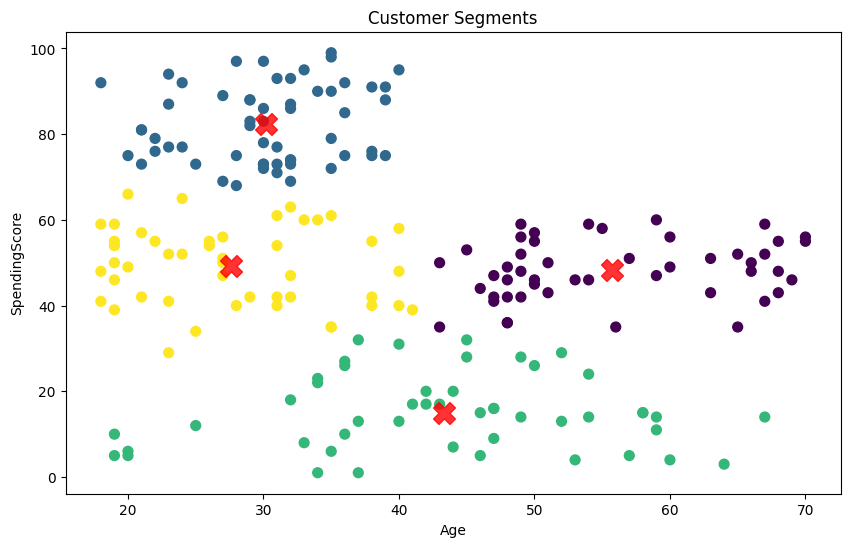

In [78]:
plt.figure(figsize = (10,6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = y_kmeans, s = 50, cmap = "viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = "red", s = 250, alpha = 0.8, marker = "X")
plt.xlabel("Age")
plt.ylabel("SpendingScore")
plt.title("Customer Segments")
plt.show()

### 3D Clustering Age , Annual Income and Spending Score

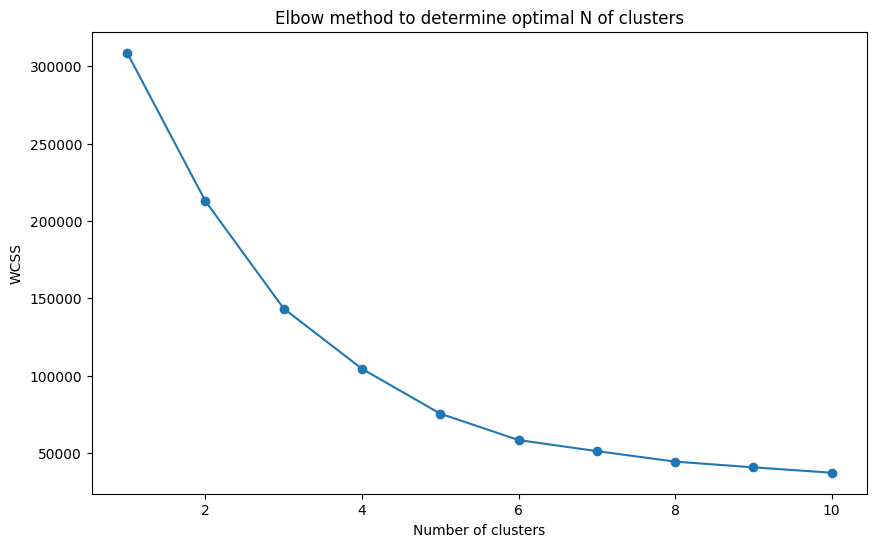

In [79]:
X = df[["Age","AnnualIncome","SpendingScore"]]
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append([i, kmeans.inertia_])
xy  = np.array(wcss) # transform list to numpy
plt.figure(figsize = (10 , 6))
plt.plot(xy[:, 0], xy[:, 1], linestyle = "-", marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow method to determine optimal N of clusters");

In [60]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
df["ClusterAgeIncomeSpend"] = y_kmeans
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,ClusterAge,ClusterAgeIncomeSpend
0,1,Male,19,15,39,3,3,4
1,2,Male,21,15,81,4,1,5
2,3,Female,20,16,6,3,2,4
3,4,Female,23,16,77,4,1,5
4,5,Female,31,17,40,3,3,4


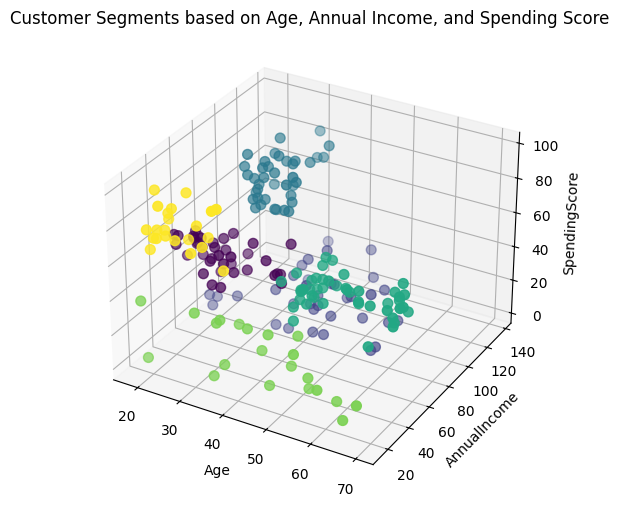

In [80]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df["Age"], df["AnnualIncome"], df["SpendingScore"], c = df["ClusterAgeIncomeSpend"], s = 50, cmap = "viridis")
ax.set_xlabel("Age")
ax.set_ylabel("AnnualIncome")
ax.set_zlabel("SpendingScore")
plt.title("Customer Segments based on Age, Annual Income, and Spending Score")
plt.show()